In [1]:
import numpyro
from numpyro.infer import MCMC, NUTS, init_to_median
import numpyro.distributions as dist
from numpyro.infer.util import log_likelihood
import jax
import jax.numpy as jnp
from jax import random
import arviz as az
import pandas as pd
import numpy as np
import xarray as xr

In [2]:
numpyro.util.enable_x64(True)

In [3]:
# Import and prepare data
data = pd.read_csv('../datasets/model_dataset.csv')
dataset = data.query('year >= 2011').copy()
# dataset = data.copy()
dataset["exp"] = (dataset["exp"] - dataset["exp"].mean()) / dataset["exp"].std()
dataset["age"] = (dataset["age"] - dataset["age"].mean()) / dataset["age"].std()
dataset["tenure"] = (dataset["tenure"] - dataset["tenure"].mean()) / dataset["tenure"].std()

In [4]:
# Prepare data for running the model
X = dataset[["exp","sex","elementary_edu", "highschool_edu", "postsec_edu",
             "undergrad_edu", "graduate_edu", "age", "tenure", "union",
             "part_time", "public_sector", "public_sector", "self_emp",
             "grad_highschool_refyear", "grad_college_refyear", "grad_univ_refyear"]].values
y = dataset["salary"].values
ind = pd.factorize(dataset["industry"])[0]

In [5]:
def model(X, y):
    # Priors
    avg_salary = numpyro.sample("avg_salary", dist.Normal(10, 10))
    beta_exp = numpyro.sample("beta_exp", dist.Normal(0, 10))
    beta_sex = numpyro.sample("beta_sex", dist.Normal(0, 10))
    beta_elementary_edu = numpyro.sample("beta_elementary_edu", dist.Normal(0, 10))
    beta_highschool_edu = numpyro.sample("beta_highschool_edu", dist.Normal(0, 10))
    beta_postsec_edu = numpyro.sample("beta_postsec_edu", dist.Normal(0, 10))
    beta_undergrad_edu = numpyro.sample("beta_undergrad_edu", dist.Normal(0, 10))
    beta_graduate_edu = numpyro.sample("beta_graduate_edu", dist.Normal(0, 10))
    beta_age = numpyro.sample("beta_age", dist.Normal(0, 10))
    beta_tenure = numpyro.sample("beta_tenure", dist.Normal(0, 10))
    beta_union = numpyro.sample("beta_union", dist.Normal(0, 10))
    beta_part_time = numpyro.sample("beta_part_time", dist.Normal(0, 10))
    beta_public_sector = numpyro.sample("beta_public_sector", dist.Normal(0, 10))
    beta_self_emp = numpyro.sample("beta_self_emp", dist.Normal(0, 10))
    beta_grad_highschool_refyear = numpyro.sample("beta_grad_highschool_refyear", dist.Normal(0, 10))
    beta_grad_college_refyear = numpyro.sample("beta_grad_college_refyear", dist.Normal(0, 10))
    beta_grad_univ_refyear = numpyro.sample("beta_grad_univ_refyear", dist.Normal(0, 10))
    shape = numpyro.sample("shape", dist.Uniform(0, 10))


    # Expected value
    mu = (avg_salary + beta_exp * X[:,0] + beta_sex * X[:,1] + beta_elementary_edu * X[:,2]
         + beta_highschool_edu * X[:,3] + beta_postsec_edu * X[:,4] + beta_undergrad_edu * X[:,5]
            + beta_graduate_edu * X[:,6] + beta_age * X[:,7] + beta_tenure * X[:,8] + beta_union * X[:,9]
            + beta_part_time * X[:,10] + beta_public_sector * X[:,11] + beta_self_emp * X[:,12]
            + beta_grad_highschool_refyear * X[:,13] + beta_grad_college_refyear * X[:,14]
            + beta_grad_univ_refyear * X[:,15])
    mu = jnp.exp(mu)
    rate = shape/mu

    # Likelihood
    numpyro.sample("salary_hat", dist.Gamma(concentration=shape, rate=rate), obs=y)

def hierarchical(X, y, ind):
    # Hyperpriors
    mu_avg_salary = numpyro.sample("mu_avg_salary", dist.Normal(10, 3))
    sigma_avg_salary = numpyro.sample("sigma_avg_salary", dist.HalfNormal(3))
    mu_beta_exp = numpyro.sample("mu_beta_exp", dist.Normal(0, 3))
    sigma_beta_exp = numpyro.sample("sigma_beta_exp", dist.HalfNormal(3))
    mu_beta_sex = numpyro.sample("mu_beta_sex", dist.Normal(0, 3))
    sigma_beta_sex = numpyro.sample("sigma_beta_sex", dist.HalfNormal(3))
    mu_beta_elementary_edu = numpyro.sample("mu_beta_elementary_edu", dist.Normal(0, 3))
    sigma_beta_elementary_edu = numpyro.sample("sigma_beta_elementary_edu", dist.HalfNormal(3))
    mu_beta_highschool_edu = numpyro.sample("mu_beta_highschool_edu", dist.Normal(0, 3))
    sigma_beta_highschool_edu = numpyro.sample("sigma_beta_highschool_edu", dist.HalfNormal(3))
    mu_beta_postsec_edu = numpyro.sample("mu_beta_postsec_edu", dist.Normal(0, 3))
    sigma_beta_postsec_edu = numpyro.sample("sigma_beta_postsec_edu", dist.HalfNormal(3))
    mu_beta_undergrad_edu = numpyro.sample("mu_beta_undergrad_edu", dist.Normal(0, 3))
    sigma_beta_undergrad_edu = numpyro.sample("sigma_beta_undergrad_edu", dist.HalfNormal(3))
    mu_beta_graduate_edu = numpyro.sample("mu_beta_graduate_edu", dist.Normal(0, 3))
    sigma_beta_graduate_edu = numpyro.sample("sigma_beta_graduate_edu", dist.HalfNormal(3))
    mu_beta_age = numpyro.sample("mu_beta_age", dist.Normal(0, 3))
    sigma_beta_age = numpyro.sample("sigma_beta_age", dist.HalfNormal(3))
    mu_beta_tenure = numpyro.sample("mu_beta_tenure", dist.Normal(0, 3))
    sigma_beta_tenure = numpyro.sample("sigma_beta_tenure", dist.HalfNormal(3))
    mu_beta_union = numpyro.sample("mu_beta_union", dist.Normal(0, 3))
    sigma_beta_union = numpyro.sample("sigma_beta_union", dist.HalfNormal(3))
    mu_beta_part_time = numpyro.sample("mu_beta_part_time", dist.Normal(0, 3))
    sigma_beta_part_time = numpyro.sample("sigma_beta_part_time", dist.HalfNormal(3))
    mu_beta_public_sector = numpyro.sample("mu_beta_public_sector", dist.Normal(0, 3))
    sigma_beta_public_sector = numpyro.sample("sigma_beta_public_sector", dist.HalfNormal(3))
    mu_beta_self_emp = numpyro.sample("mu_beta_self_emp", dist.Normal(0, 3))
    sigma_beta_self_emp = numpyro.sample("sigma_beta_self_emp", dist.HalfNormal(3))
    mu_beta_grad_highschool_refyear = numpyro.sample("mu_beta_grad_highschool_refyear", dist.Normal(0, 3))
    sigma_beta_grad_highschool_refyear = numpyro.sample("sigma_beta_grad_highschool_refyear", dist.HalfNormal(3))
    mu_beta_grad_college_refyear = numpyro.sample("mu_beta_grad_college_refyear", dist.Normal(0, 3))
    sigma_beta_grad_college_refyear = numpyro.sample("sigma_beta_grad_college_refyear", dist.HalfNormal(3))
    mu_beta_grad_univ_refyear = numpyro.sample("mu_beta_grad_univ_refyear", dist.Normal(0, 3))
    sigma_beta_grad_univ_refyear = numpyro.sample("sigma_beta_grad_univ_refyear", dist.HalfNormal(3))

    # Priors
    with numpyro.plate("industry", ind.max() + 1):
        avg_salary_offset = numpyro.sample("offset_avg_salary", dist.Normal(0, 1))
        avg_salary = numpyro.deterministic("avg_salary", mu_avg_salary + sigma_avg_salary * avg_salary_offset)
        beta_exp_offset = numpyro.sample("offset_beta_exp", dist.Normal(0, 1))
        beta_exp = numpyro.deterministic("beta_exp", mu_beta_exp + sigma_beta_exp * beta_exp_offset)
        beta_sex_offset = numpyro.sample("offset_beta_sex", dist.Normal(0, 1))
        beta_sex = numpyro.deterministic("beta_sex", mu_beta_sex + sigma_beta_sex * beta_sex_offset)
        beta_elementary_edu_offset = numpyro.sample("offset_beta_elementary_edu", dist.Normal(0, 1))
        beta_elementary_edu = numpyro.deterministic("beta_elementary_edu", mu_beta_elementary_edu + sigma_beta_elementary_edu * beta_elementary_edu_offset)
        beta_highschool_edu_offset = numpyro.sample("offset_beta_highschool_edu", dist.Normal(0, 1))
        beta_highschool_edu = numpyro.deterministic("beta_highschool_edu", mu_beta_highschool_edu + sigma_beta_highschool_edu * beta_highschool_edu_offset)
        beta_postsec_edu_offset = numpyro.sample("offset_beta_postsec_edu", dist.Normal(0, 1))
        beta_postsec_edu = numpyro.deterministic("beta_postsec_edu", mu_beta_postsec_edu + sigma_beta_postsec_edu * beta_postsec_edu_offset)
        beta_undergrad_edu_offset = numpyro.sample("offset_beta_undergrad_edu", dist.Normal(0, 1))
        beta_undergrad_edu = numpyro.deterministic("beta_undergrad_edu", mu_beta_undergrad_edu + sigma_beta_undergrad_edu * beta_undergrad_edu_offset)
        beta_graduate_edu_offset = numpyro.sample("offset_beta_graduate_edu", dist.Normal(0, 1))
        beta_graduate_edu = numpyro.deterministic("beta_graduate_edu", mu_beta_graduate_edu + sigma_beta_graduate_edu * beta_graduate_edu_offset)
        beta_age_offset = numpyro.sample("offset_beta_age", dist.Normal(0, 1))
        beta_age = numpyro.deterministic("beta_age", mu_beta_age + sigma_beta_age * beta_age_offset)
        beta_tenure_offset = numpyro.sample("offset_beta_tenure", dist.Normal(0, 1))
        beta_tenure = numpyro.deterministic("beta_tenure", mu_beta_tenure + sigma_beta_tenure * beta_tenure_offset)
        beta_union_offset = numpyro.sample("offset_beta_union", dist.Normal(0, 1))
        beta_union = numpyro.deterministic("beta_union", mu_beta_union + sigma_beta_union * beta_union_offset)
        beta_part_time_offset = numpyro.sample("offset_beta_part_time", dist.Normal(0, 1))
        beta_part_time = numpyro.deterministic("beta_part_time", mu_beta_part_time + sigma_beta_part_time * beta_part_time_offset)
        beta_public_sector_offset = numpyro.sample("offset_beta_public_sector", dist.Normal(0, 1))
        beta_public_sector = numpyro.deterministic("beta_public_sector", mu_beta_public_sector + sigma_beta_public_sector * beta_public_sector_offset)
        beta_self_emp_offset = numpyro.sample("offset_beta_self_emp", dist.Normal(0, 1))
        beta_self_emp = numpyro.deterministic("beta_self_emp", mu_beta_self_emp + sigma_beta_self_emp * beta_self_emp_offset)
        beta_grad_highschool_refyear_offset = numpyro.sample("offset_beta_grad_highschool_refyear", dist.Normal(0, 1))
        beta_grad_highschool_refyear = numpyro.deterministic("beta_grad_highschool_refyear", mu_beta_grad_highschool_refyear + sigma_beta_grad_highschool_refyear * beta_grad_highschool_refyear_offset)
        beta_grad_college_refyear_offset = numpyro.sample("offset_beta_grad_college_refyear", dist.Normal(0, 1))
        beta_grad_college_refyear = numpyro.deterministic("beta_grad_college_refyear", mu_beta_grad_college_refyear + sigma_beta_grad_college_refyear * beta_grad_college_refyear_offset)
        beta_grad_univ_refyear_offset = numpyro.sample("offset_beta_grad_univ_refyear", dist.Normal(0, 1))
        beta_grad_univ_refyear = numpyro.deterministic("beta_grad_univ_refyear", mu_beta_grad_univ_refyear + sigma_beta_grad_univ_refyear * beta_grad_univ_refyear_offset)
    shape = numpyro.sample("shape", dist.Uniform(0, 10))

    # Expected value
    mu = (avg_salary[ind] + beta_exp[ind] * X[:,0] + beta_sex[ind] * X[:,1] + beta_elementary_edu[ind] * X[:,2]
         + beta_highschool_edu[ind] * X[:,3] + beta_postsec_edu[ind] * X[:,4] + beta_undergrad_edu[ind] * X[:,5]
            + beta_graduate_edu[ind] * X[:,6] + beta_age[ind] * X[:,7] + beta_tenure[ind] * X[:,8] + beta_union[ind] * X[:,9]
            + beta_part_time[ind] * X[:,10] + beta_public_sector[ind] * X[:,11] + beta_self_emp[ind] * X[:,12]
            + beta_grad_highschool_refyear[ind] * X[:,13] + beta_grad_college_refyear[ind] * X[:,14]
            + beta_grad_univ_refyear[ind] * X[:,15])
    mu = jnp.exp(mu) + 1e-6
    rate = shape/(mu + 1e-6)

    # Likelihood
    numpyro.sample("salary_hat", dist.Gamma(concentration=shape, rate=rate), obs=y)


## Normal sampling

In [ ]:
rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)
kernel = NUTS(model, target_accept_prob=0.95)
mcmc = MCMC(kernel, num_warmup=2000, num_samples=2000, num_chains=4, chain_method="vectorized")
mcmc.run(rng_key, X, y)

In [11]:
trace = az.from_numpyro(mcmc)
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [12]:
az.summary(az.from_numpyro(mcmc), round_to=5)

mean       sd   hdi_3%   hdi_97%  mcse_mean  \
avg_salary                    2.61006  4.88530 -0.76399  11.16947    2.43215   
beta_age                      0.07888  0.07600  0.00027   0.18154    0.03785   
beta_elementary_edu          -1.21169  0.53735 -1.69928  -0.14180    0.26088   
beta_exp                     -0.45651  0.81706 -1.85005   0.15096    0.40688   
beta_grad_college_refyear    -0.32706  1.13145 -1.92992   1.21848    0.56287   
beta_grad_highschool_refyear -0.99213  0.64530 -1.70982  -0.07788    0.32123   
beta_grad_univ_refyear       -0.30490  1.05118 -1.86470   1.09578    0.52335   
beta_graduate_edu            -0.13904  0.99284 -1.84244   0.60454    0.49100   
beta_highschool_edu           0.03504  0.55043 -0.74601   0.56503    0.26795   
beta_part_time               -0.99009  0.22484 -1.28806  -0.72381    0.11179   
beta_postsec_edu             -0.64826  0.59789 -1.57994   0.20859    0.29207   
beta_public_sector            0.32842  1.27065 -2.11579   2.86668    0.34013   
beta_self_emp                 0.09198  1.45605 -2.65124   2.31386    0.49731   
beta_sex                      0.50094  0.48752 -0.26943   0.97265    0.24276   
beta_tenure                   0.11402  0.07278  0.00084   0.18931    0.03625   
beta_undergrad_edu           -0.67110  0.78371 -1.79438   0.49677    0.38594   
beta_union                   -0.10985  1.02048 -1.27877   1.44602    0.50818   
shape                         4.90152  2.22902  2.21064   8.40634    1.10984   

                              mcse_sd  ess_bulk  ess_tail    r_hat  
avg_salary                    1.86216   4.32385   4.03226  3.98837  
beta_age                      0.02898   4.31340  28.81971  9.41754  
beta_elementary_edu           0.20389   4.32303   4.03226  3.99089  
beta_exp                      0.31155   4.31843   4.03226  9.05037  
beta_grad_college_refyear     0.43101   4.07994   4.03226  9.40090  
beta_grad_highschool_refyear  0.24605   4.31242   4.03226  3.98626  
beta_grad_univ_refyear        0.40080   4.08595   4.03226  9.40145  
beta_graduate_edu             0.37735   6.02337   4.03226  3.60934  
beta_highschool_edu           0.20437   4.17332   4.07497  5.60183  
beta_part_time                0.08565   4.32999   4.03226  7.60693  
beta_postsec_edu              0.22780   4.37555   4.03226  3.71255  
beta_public_sector            0.24572  11.36691  29.14467  1.85515  
beta_self_emp                 0.36437  10.14504  29.16365  2.28643  
beta_sex                      0.18588   4.31372  27.92230  3.98562  
beta_tenure                   0.02775   4.31550  28.61454  3.98632  
beta_undergrad_edu            0.29813   4.32959   4.03226  3.96843  
beta_union                    0.38912   4.08001   4.03226  9.40331  
shape                         0.84982   4.21605   4.03226  9.43688

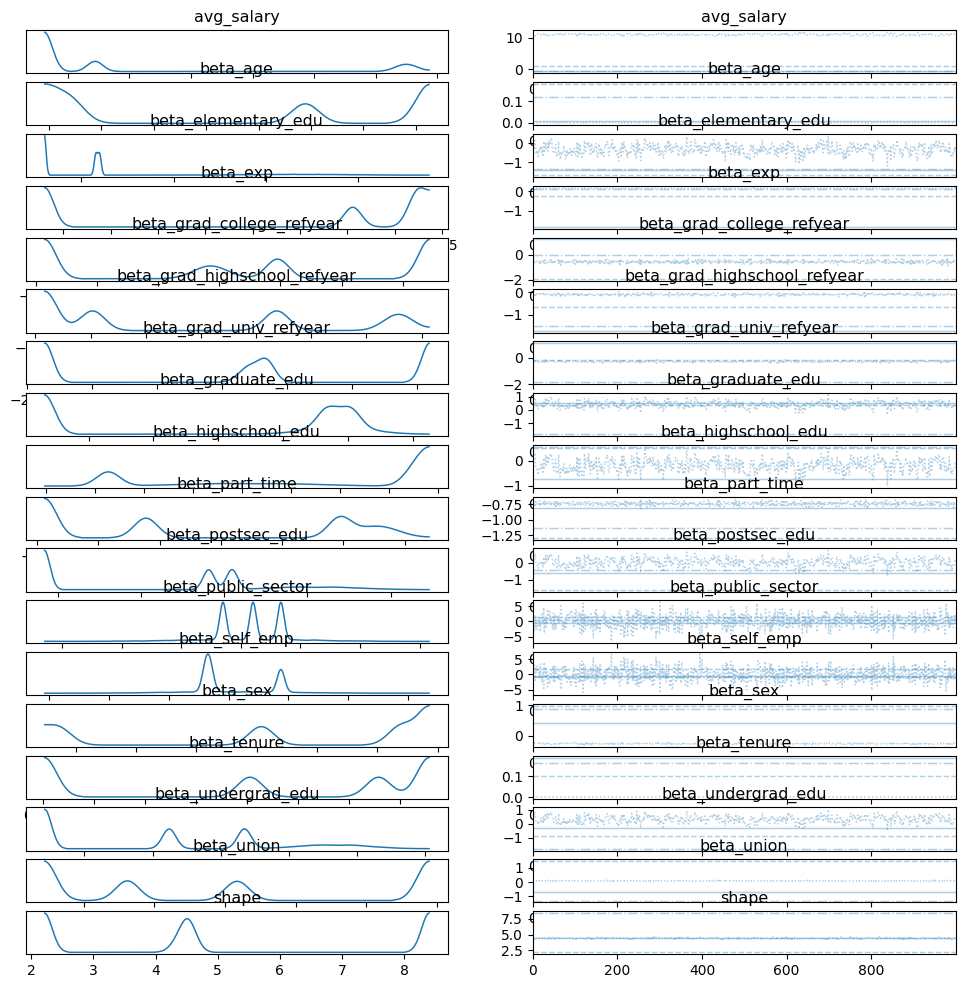

In [13]:
az.plot_trace(az.from_numpyro(mcmc), combined=True, figsize=(12, 12));

In [137]:
az.plot_posterior(az.from_numpyro(mcmc), round_to=5);

## Sequential sampling

In [6]:
def concat_samples(samples):
    for key in samples[0]:
        samples[0][key] = jnp.concatenate([samples[0][key], samples[1][key]], axis=1)
    return samples[0]

In [7]:
def create_inference_data_nodim(mcmc,
                          samples, 
                          divergences, 
                          loglikelihood, 
                          dimension_name, 
                          dimension,
                          target):
    trace = az.from_numpyro(mcmc)
    chains, draws = samples["avg_salary"].shape
    print(chains, draws)
    obs = target.shape[0]

    posterior_dataset = xr.Dataset(
        data_vars = { var: (["chain", "draw"], samples[var]) for var in samples.keys() },
        coords = { "chain": np.arange(chains), "draw": np.arange(draws) },
        attrs = trace.posterior.attrs,
    )
    loglike_dataset = xr.Dataset(
        data_vars=dict(log_likelihood=(["chain", "draw", "obs"], loglikelihood)),
        coords=dict(chain=np.arange(chains), draw=np.arange(draws), obs=np.arange(obs)),
        attrs=trace.log_likelihood.attrs
    )
    sample_stats = xr.Dataset(
        data_vars=dict(diverging=(["chain", "draw"], divergences)),
        coords=dict(chain=np.arange(chains),draw=np.arange(draws)),
        attrs=trace.sample_stats.attrs,
    )
    observed_data = xr.Dataset(
        data_vars=dict(salary=(["obs"], target)),
        coords=dict(obs=np.arange(obs)),
        attrs=trace.observed_data.attrs,
    )

    return az.InferenceData(posterior=posterior_dataset,
                 log_likelihood=loglike_dataset,
                 sample_stats=sample_stats,
                 observed_data=observed_data)

def create_inference_data(mcmc,
                          samples, 
                          divergences, 
                          loglikelihood, 
                          dimension_name, 
                          dimension,
                          target):
    trace = az.from_numpyro(mcmc)
    chains, draws, dim = samples["avg_salary"].shape
    obs = target.shape[0]

    posterior_dataset = xr.Dataset(
        data_vars = { var: (["chain", "draw", f"{dimension_name}"], samples[var]) 
                     if len(samples[var].shape)==3 else (["chain", "draw"], samples[var])
                     for var in samples.keys()  },
        coords = { "chain": np.arange(chains), "draw": np.arange(draws), f"{dimension_name}": dimension },
        attrs = trace.posterior.attrs,
    )
    loglike_dataset = xr.Dataset(
        data_vars=dict(log_likelihood=(["chain", "draw", "obs"], loglikelihood)),
        coords=dict(chain=np.arange(chains), draw=np.arange(draws), obs=np.arange(obs)),
        attrs=trace.log_likelihood.attrs
    )
    sample_stats = xr.Dataset(
        data_vars=dict(diverging=(["chain", "draw"], divergences)),
        coords=dict(chain=np.arange(chains),draw=np.arange(draws)),
        attrs=trace.sample_stats.attrs,
    )
    observed_data = xr.Dataset(
        data_vars=dict(salary=(["obs"], target)),
        coords=dict(obs=np.arange(obs)),
        attrs=trace.observed_data.attrs,
    )

    return az.InferenceData(posterior=posterior_dataset,
                 log_likelihood=loglike_dataset,
                 sample_stats=sample_stats,
                 observed_data=observed_data)

In [15]:
import pickle
def save_model_pickle(mcmc, outputs_path):
    """
    Save model pickle
    """
    with open(fr"{outputs_path}/model.pickle", "wb") as output_file:
        pickle.dump(mcmc, output_file)

In [16]:
iterations = 10
samples = None
divergences = None
logll = None
rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)
kernel = NUTS(hierarchical, target_accept_prob=0.98, dense_mass=True, max_tree_depth=12, init_strategy=init_to_median(num_samples=100))
mcmc = MCMC(kernel, num_warmup=200, num_samples=200, num_chains=4, chain_method="vectorized")
mcmc.run(rng_key, X, y, ind)
samples = { key: jnp.array(value) for key, value in mcmc.get_samples(group_by_chain=True).items() }
divergences = jnp.array(mcmc.get_extra_fields(group_by_chain=True)["diverging"])
logll = jnp.array(log_likelihood(hierarchical, mcmc.get_samples(), X, y, ind, batch_ndims=1)["salary_hat"].reshape(4, 200, -1))

samples = { key: jax.device_put(value, device=jax.devices("cpu")[0]) for key, value in samples.items() }
divergences = jax.device_put(divergences, jax.devices("cpu")[0])
logll = jax.device_put(logll, jax.devices("cpu")[0])
trace = create_inference_data(mcmc, samples, divergences, logll, "industry", range(ind.max()+1), y)
max_rhat = az.summary(trace, round_to=5)["r_hat"].max()
save_model_pickle(mcmc, "../outputs")
print(f">>>>>>>>>>>>>>>> Warmup complete - max_rhat: {max_rhat} <<<<<<<<<<<<<<<<<<<<")

for it in range(iterations):
    mcmc.post_warmup_state = mcmc.last_state
    mcmc.run(mcmc.post_warmup_state.rng_key, X, y, ind)
    samples = concat_samples([samples, mcmc.get_samples(group_by_chain=True)])
    divergences = jnp.concatenate([divergences, mcmc.get_extra_fields(group_by_chain=True)["diverging"]], axis=1)
    logll = jnp.concatenate([logll, log_likelihood(hierarchical, mcmc.get_samples(), X, y, ind, batch_ndims=1)["salary_hat"].reshape(4,200,-1)], axis=1)
    trace = create_inference_data(mcmc, samples, divergences, logll, "industry", range(ind.max()+1), y)
    max_rhat = az.summary(trace, round_to=5)["r_hat"].max()
    save_model_pickle(mcmc, "../outputs")
    trace.to_netcdf(f"../outputs/trace_{it}.nc")
    print(f">>>>>>>>>>>>>>>> Iteration {it+1}/{iterations} complete - max_rhat: {max_rhat} <<<<<<<<<<<<<<<<<<<<")
    if max_rhat <= 1.01:
        print(f"Convergence reached iteration: {it}")
        break
trace = create_inference_data(mcmc, samples, divergences, logll, "industry", range(ind.max()+1), y)

sample: 100%|██████████| 400/400 [23:28<00:00,  3.52s/it]


>>>>>>>>>>>>>>>> Warmup complete - max_rhat: 1.18372 <<<<<<<<<<<<<<<<<<<<


sample: 100%|██████████| 200/200 [12:41<00:00,  3.81s/it]


>>>>>>>>>>>>>>>> Iteration 1/10 complete - max_rhat: 1.10836 <<<<<<<<<<<<<<<<<<<<


sample: 100%|██████████| 200/200 [12:51<00:00,  3.86s/it]


>>>>>>>>>>>>>>>> Iteration 2/10 complete - max_rhat: 1.04841 <<<<<<<<<<<<<<<<<<<<


sample:  10%|█         | 20/200 [01:18<11:48,  3.94s/it]


KeyboardInterrupt: 

In [12]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [13]:
az.summary(trace, round_to=5)

mean       sd    hdi_3%   hdi_97%  mcse_mean  \
avg_salary[0]             11.11025  0.29915  10.49275  11.63279    0.09164   
avg_salary[1]             11.08431  0.23644  10.69829  11.52323    0.04513   
avg_salary[2]             10.98916  0.23595  10.59996  11.43721    0.02956   
avg_salary[3]             11.22011  0.24546  10.81917  11.73689    0.04709   
avg_salary[4]             11.16754  0.24330  10.76468  11.61151    0.03954   
...                            ...      ...       ...       ...        ...   
sigma_beta_self_emp        0.25467  0.32460   0.01833   0.53200    0.07871   
sigma_beta_sex             0.12627  0.28342   0.00662   0.22053    0.05358   
sigma_beta_tenure          0.10357  0.27762   0.01423   0.19529    0.05095   
sigma_beta_undergrad_edu   0.13677  0.27705   0.00232   0.21775    0.05495   
sigma_beta_union           0.16535  0.31392   0.03778   0.22276    0.05262   

                          mcse_sd  ess_bulk   ess_tail    r_hat  
avg_salary[0]             0.06666  10.34342   97.61512  1.32631  
avg_salary[1]             0.03226  27.44713  118.45008  1.11626  
avg_salary[2]             0.02100  66.06516  149.18985  1.05868  
avg_salary[3]             0.03371  26.86061  159.39431  1.11159  
avg_salary[4]             0.02818  33.91015  143.95669  1.10081  
...                           ...       ...        ...      ...  
sigma_beta_self_emp       0.05664   7.30254   28.44387  1.54090  
sigma_beta_sex            0.03829  10.20475   17.12924  1.31177  
sigma_beta_tenure         0.03639  10.36638   31.64299  1.30419  
sigma_beta_undergrad_edu  0.03931   7.71756   22.94208  1.48926  
sigma_beta_union          0.03752  47.10914   28.16484  1.04123  

[579 rows x 9 columns]

In [14]:
az.plot_trace(trace, combined=False, figsize=(12, 65));

/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (69), generating only 20 plots
  warnings.warn(


In [44]:
az.plot_posterior(trace, round_to=5);

## SVI

In [35]:
# Import and prepare data
data = pd.read_csv('../datasets/model_dataset.csv')
dataset = data.query('year >= 2011').copy()
# dataset = data.copy()
dataset["exp"] = (dataset["exp"] - dataset["exp"].mean()) / dataset["exp"].std()
dataset["age"] = (dataset["age"] - dataset["age"].mean()) / dataset["age"].std()
dataset["tenure"] = (dataset["tenure"] - dataset["tenure"].mean()) / dataset["tenure"].std()
# Prepare data for running the model
X = dataset[["exp","sex","elementary_edu", "highschool_edu", "postsec_edu",
             "undergrad_edu", "graduate_edu", "age", "tenure", "union",
             "part_time", "public_sector", "public_sector", "self_emp",
             "grad_highschool_refyear", "grad_college_refyear", "grad_univ_refyear"]].values
y = dataset["salary"].values
ind = pd.factorize(dataset["industry"])[0]

In [37]:
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
from numpyro.infer import SVI, Trace_ELBO
import numpyro.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt



def guide(X, y):
    param_names = [
        "avg_salary", "beta_exp", "beta_sex", "beta_elementary_edu", "beta_highschool_edu",
        "beta_postsec_edu", "beta_undergrad_edu", "beta_graduate_edu", "beta_age", "beta_tenure",
        "beta_union", "beta_part_time", "beta_public_sector", "beta_self_emp", 
        "beta_grad_highschool_refyear", "beta_grad_college_refyear", "beta_grad_univ_refyear"
    ]
    
    for param_name in param_names:
        loc = numpyro.param(f"{param_name}_loc", init_value=jnp.array(0.))
        scale = numpyro.param(f"{param_name}_scale", init_value=jnp.array(10.), constraint=dist.constraints.positive)
        numpyro.sample(param_name, dist.Normal(loc, scale))
        
    numpyro.sample("shape", dist.Uniform(0, 10))

# Run SVI
optimizer = numpyro.optim.Adam(step_size=0.01)
svi = SVI(model, guide, optimizer, loss=Trace_ELBO())
svi_result = svi.run(random.PRNGKey(0), 200000, X, y)
params = svi_result.params
params

100%|██████████| 200000/200000 [03:43<00:00, 894.59it/s, init loss: 252330892189553817288704000.0000, avg. loss [190001-200000]: 44714190682830002978816.0000]                                


{'avg_salary_loc': Array(1.55959218, dtype=float64),
 'avg_salary_scale': Array(4.73165709, dtype=float64),
 'beta_age_loc': Array(1.45807583, dtype=float64),
 'beta_age_scale': Array(2.88027055, dtype=float64),
 'beta_elementary_edu_loc': Array(4.6779924, dtype=float64),
 'beta_elementary_edu_scale': Array(0.68511957, dtype=float64),
 'beta_exp_loc': Array(1.33612364, dtype=float64),
 'beta_exp_scale': Array(2.21612241, dtype=float64),
 'beta_grad_college_refyear_loc': Array(3.65032758, dtype=float64),
 'beta_grad_college_refyear_scale': Array(0.9647649, dtype=float64),
 'beta_grad_highschool_refyear_loc': Array(3.76951224, dtype=float64),
 'beta_grad_highschool_refyear_scale': Array(1.50378623, dtype=float64),
 'beta_grad_univ_refyear_loc': Array(1.91052228, dtype=float64),
 'beta_grad_univ_refyear_scale': Array(3.17836693, dtype=float64),
 'beta_graduate_edu_loc': Array(2.83421402, dtype=float64),
 'beta_graduate_edu_scale': Array(1.774637, dtype=float64),
 'beta_highschool_edu_loc'

In [31]:
plt.plot(svi_result.losses)# Initialize SVI
optimizer = optim.Adam(0.01)
svi = SVI(hierarchical, guide, optimizer, loss=Trace_ELBO())

In [58]:
log_likelihood(model, mcmc.get_samples(), X, y, batch_ndims=1)["salary_hat"].shape

(400, 4370)

In [60]:
y.shape

(4370,)